# IND320 Project Work

 - **Github Link :** https://github.com/Mobashra/M-Abeer-Project
 - **Streamlit Link :** https://m-abeer-project.streamlit.app/

### Importing all necessary libraries ###

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

## Subtask 1 : Reading the CSV file and printing its content

This code reads a CSV file into a pandas DataFrame and shows the first 5 rows of the data by default.

In [2]:
df = pd.read_csv('../../IND320/Mobashra Abeer_Streamlit Project/open-meteo-subset.csv')
df.head()


,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284


## Subtask 2

***Converting 'time' column to datetime format of pandas***

In [3]:
df['time'] = pd.to_datetime(df['time'])

print(df.head())



# Add a date column (ignore hours)
# df["date"] = df["time"].dt.date

# # Group by date
# daily_summary = df.groupby("date").agg({
#     "temperature_2m (°C)": ["min", "max", "mean"],
#     "precipitation (mm)": "sum",
#     "wind_speed_10m (m/s)": "mean",
#     "wind_gusts_10m (m/s)": "max"
# })

# # Round numbers for readability
# daily_summary = daily_summary.round(2)

# # print(daily_summary)

                 time  temperature_2m (°C)  precipitation (mm)  \
0 2020-01-01 00:00:00                 -2.2                 0.1   
1 2020-01-01 01:00:00                 -2.2                 0.0   
2 2020-01-01 02:00:00                 -2.3                 0.0   
3 2020-01-01 03:00:00                 -2.3                 0.0   
4 2020-01-01 04:00:00                 -2.7                 0.0   

   wind_speed_10m (m/s)  wind_gusts_10m (m/s)  wind_direction_10m (°)  
0                   9.6                  21.3                     284  
1                  10.6                  23.0                     282  
2                  11.0                  23.5                     284  
3                  10.6                  23.3                     284  
4                  10.6                  22.8                     284  


## Subtask 3 : Plotting each column separately





This dataset contains 5 variables that change over time. The goal is to visualize the time series of each variable individually.

To do this, we use display and Markdown from the IPython.display library:
 - **Markdown** -  to create a clear, formatted title for each plot.
 - **display** - to show each plot as a separate output, making it easy to view and compare all variables.

This approach allows us to neatly visualize each variable over time without manually writing a separate plotting block for each column.

<h3 style='text-align: center;'>temperature_2m (°C) Vs Time</h3>

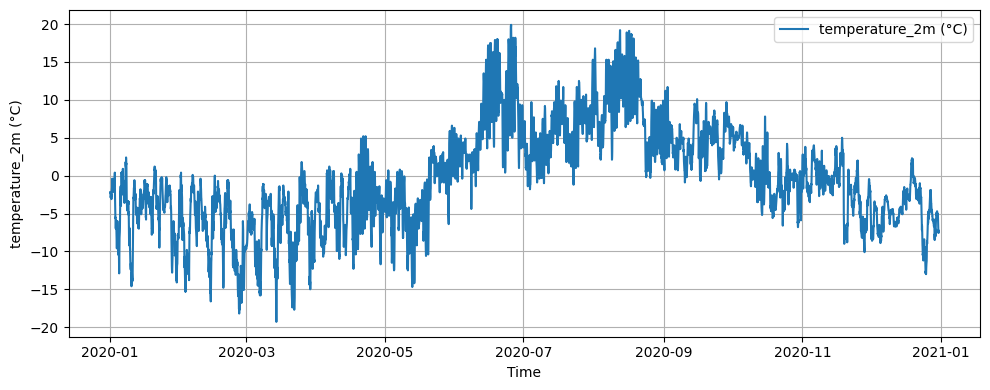

<h3 style='text-align: center;'>precipitation (mm) Vs Time</h3>

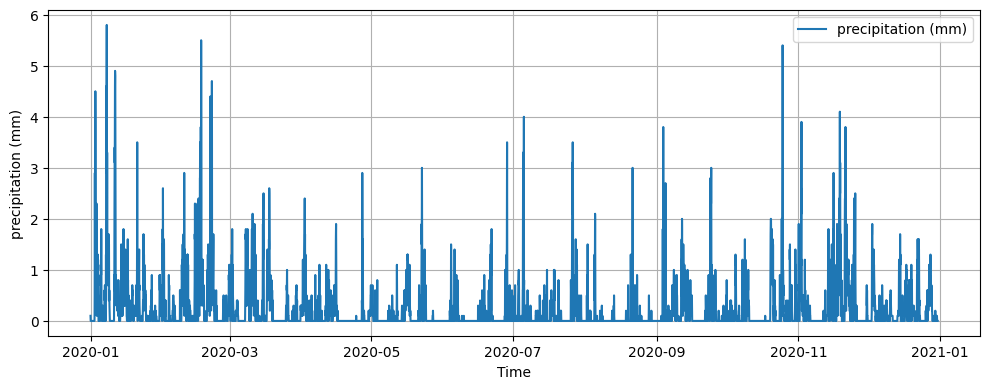

<h3 style='text-align: center;'>wind_speed_10m (m/s) Vs Time</h3>

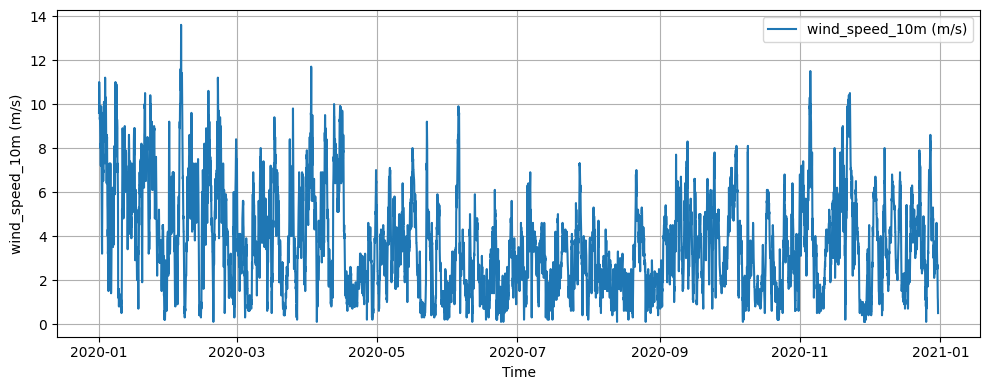

<h3 style='text-align: center;'>wind_gusts_10m (m/s) Vs Time</h3>

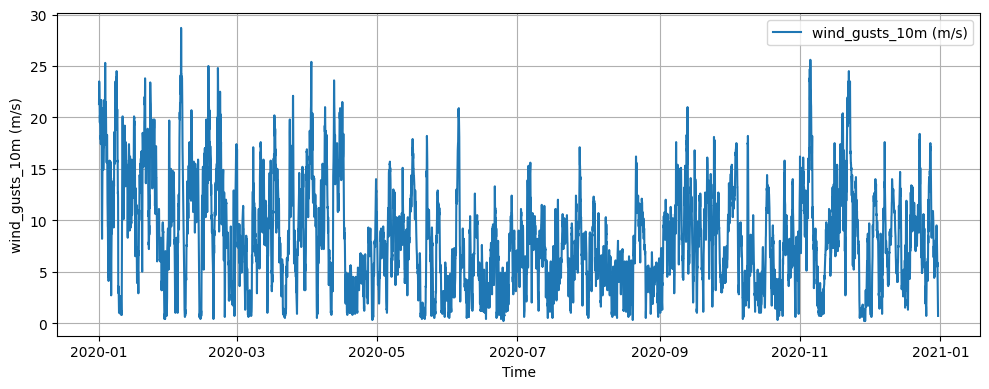

<h3 style='text-align: center;'>wind_direction_10m (°) Vs Time</h3>

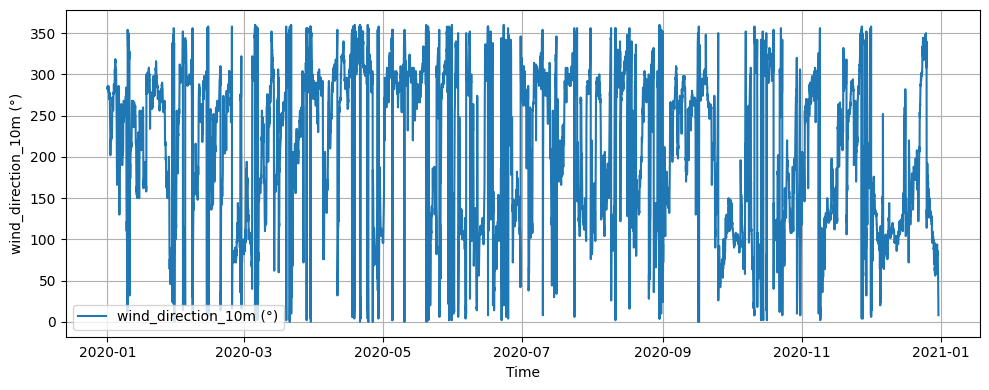

In [4]:
# Loop through columns (excluding the first, e.g., 'time')
for column in df.columns[1:]:
    display(Markdown(f"<h3 style='text-align: center;'>{column} Vs Time</h3>"))
    
    # Create the plot
    plt.figure(figsize = (10, 4))
    plt.plot(df['time'], df[column], label = column)
    plt.xlabel("Time")
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()





## Subtask 4 : Plotting all columns together

The code below plots all five different weather parameters on the same time-based chart using **multiple y-axes**. 

*Each parameter gets its own*
 - **scale**
 - **color**


*for clarity, and all are combined into a single legend.*


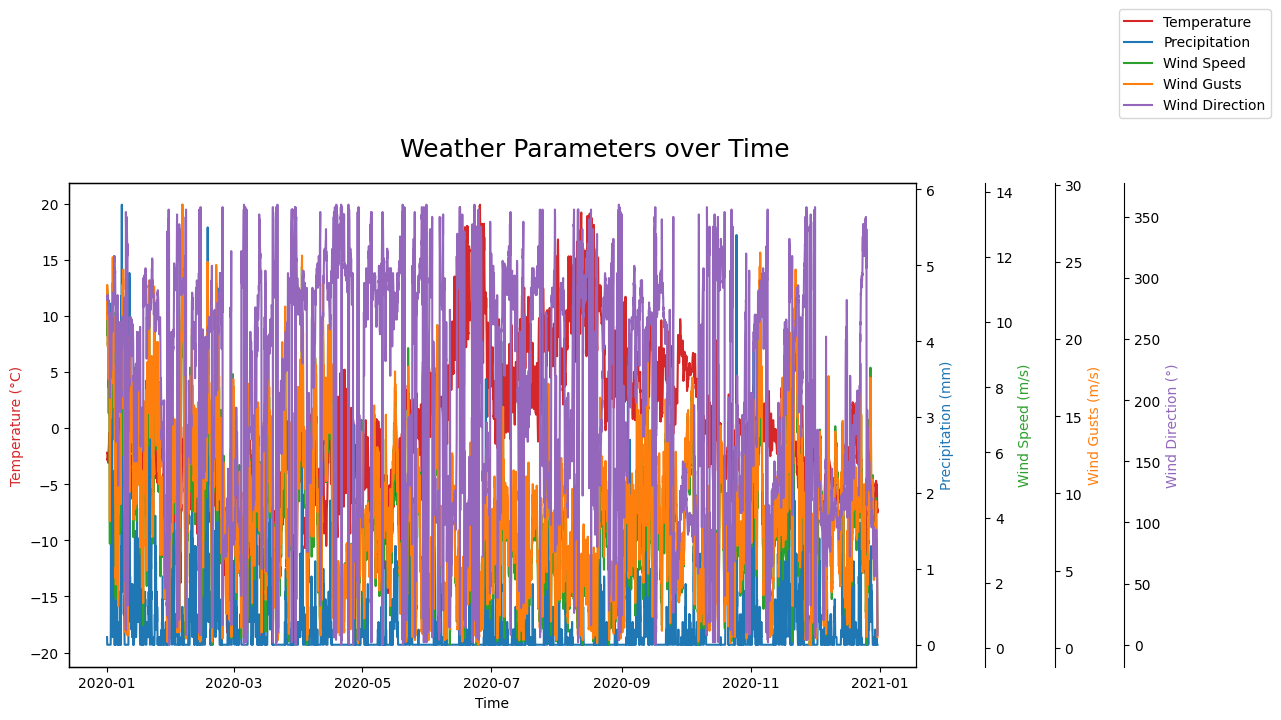

In [5]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Temperature
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature (°C)", color="tab:red")
l1, = ax1.plot(df['time'], df['temperature_2m (°C)'], color="tab:red", label="Temperature")
ax1.tick_params(axis='y')

# Precipitation
ax2 = ax1.twinx()
ax2.set_ylabel("Precipitation (mm)", color="tab:blue")
l2, = ax2.plot(df['time'], df['precipitation (mm)'], color="tab:blue", label="Precipitation")
ax2.tick_params(axis='y')

# Wind Speed and Gusts
ax3 = ax1.twinx()
ax3.spines['right'].set_position(("outward", 50))
ax3.set_ylabel("Wind Speed (m/s)", color="tab:green")
ax4 = ax1.twinx()
ax4.spines['right'].set_position(("outward", 100))
ax4.set_ylabel("Wind Gusts (m/s)", color="tab:orange")

l3, = ax3.plot(df['time'], df['wind_speed_10m (m/s)'], color="tab:green", label="Wind Speed")
l4, = ax4.plot(df['time'], df['wind_gusts_10m (m/s)'], color="tab:orange", label="Wind Gusts")
ax3.tick_params(axis='y')
ax4.tick_params(axis='y')

# Wind Direction
ax5 = ax1.twinx()
ax5.spines['right'].set_position(("outward", 150))
ax5.set_ylabel("Wind Direction (°)", color="tab:purple")
l5, = ax5.plot(df['time'], df['wind_direction_10m (°)'], color="tab:purple", label="Wind Direction")
ax5.tick_params(axis='y')

# Title and layout
fig.suptitle("Weather Parameters over Time", fontsize=18)

# Combine all legends into one
lines = [l1, l2, l3, l4, l5]
labels = [line.get_label() for line in lines]
fig.legend(lines, labels, loc="lower center", ncol=1, bbox_to_anchor=(1, 1))

fig.tight_layout()
plt.show()
